In [1]:
import matplotlib.pyplot as plt
import scienceplots
import sympy as smp
from sympy.physics.quantum import Dagger
from scipy.integrate import odeint
import numpy as np

In [2]:
hbar=1

In [3]:
t,w21,w31,wL,wP,RabiL,RabiP,gamma21,gamma31=smp.symbols(r't w_21 w_31 w_L w_P, Omega_L Omega_P gamma21 gamma31',real=True)



In [4]:
H_o=hbar*smp.Matrix([[0,0,0],[0,w21,0],[0,0,w31]])
# print(smp.latex(H_o))
H_o

Matrix([
[0,    0,    0],
[0, w_21,    0],
[0,    0, w_31]])

In [5]:
V=hbar*smp.Matrix([[0,-RabiL*smp.cos(wL*t),-RabiP*smp.cos(wP*t)],[-RabiL*smp.cos(wL*t),0,0],[-RabiP*smp.cos(wP*t),0,0]])
print(smp.latex(V))

\left[\begin{matrix}0 & - \Omega_{L} \cos{\left(t w_{L} \right)} & - \Omega_{P} \cos{\left(t w_{P} \right)}\\- \Omega_{L} \cos{\left(t w_{L} \right)} & 0 & 0\\- \Omega_{P} \cos{\left(t w_{P} \right)} & 0 & 0\end{matrix}\right]


In [6]:
H_s=H_o + V
print(smp.latex(H_s))

\left[\begin{matrix}0 & - \Omega_{L} \cos{\left(t w_{L} \right)} & - \Omega_{P} \cos{\left(t w_{P} \right)}\\- \Omega_{L} \cos{\left(t w_{L} \right)} & w_{21} & 0\\- \Omega_{P} \cos{\left(t w_{P} \right)} & 0 & w_{31}\end{matrix}\right]


In [7]:
H_IP=hbar*smp.Matrix([[0,0,0],[0,wL,0],[0,0,wP]])
print(smp.latex(H_IP))

\left[\begin{matrix}0 & 0 & 0\\0 & w_{L} & 0\\0 & 0 & w_{P}\end{matrix}\right]


In [8]:
U=smp.Matrix([[1,0,0],[0,smp.exp(smp.I*wL*t),0],[0,0,smp.exp(smp.I*wP*t)]])
U_inv=Dagger(U)
print(smp.latex(U_inv))

\left[\begin{matrix}1 & 0 & 0\\0 & e^{- i t w_{L}} & 0\\0 & 0 & e^{- i t w_{P}}\end{matrix}\right]


In [9]:
H_I=U*H_s*U_inv
i=0
for element in H_I:
    H_I[i]=element.rewrite(smp.exp)
    i+=1
H_I.simplify()
# print(smp.latex(H_I))
H_I

Matrix([
[                              0, -Omega_L/2 - Omega_L*exp(-2*I*t*w_L)/2, -Omega_P/2 - Omega_P*exp(-2*I*t*w_P)/2],
[-Omega_L*(exp(2*I*t*w_L) + 1)/2,                                   w_21,                                      0],
[-Omega_P*(exp(2*I*t*w_P) + 1)/2,                                      0,                                   w_31]])

In [10]:
H_I_RWA=hbar*smp.Matrix([[0,-RabiL/2,-RabiP/2],[-RabiL/2,w21,0],[-RabiP/2,0,w31]])
# print(smp.latex(H_I_RWA))
H_I_RWA

Matrix([
[         0, -Omega_L/2, -Omega_P/2],
[-Omega_L/2,       w_21,          0],
[-Omega_P/2,          0,       w_31]])

In [11]:
H_hat=(H_I_RWA-H_IP)
deltaL, deltaP=smp.symbols(r'\Delta_L \Delta_P',real=True)
H_hat = H_hat.subs({w21 - wL:deltaL , w31 - wP:deltaP})
H_hat.simplify()
# print(smp.latex(H_hat))
H_hat

Matrix([
[         0, -Omega_L/2, -Omega_P/2],
[-Omega_L/2,   \Delta_L,          0],
[-Omega_P/2,          0,   \Delta_P]])

In [12]:
rho11=smp.symbols(r'rho_11',real=True,cls=smp.Function)(t,RabiL,RabiP,deltaL,deltaP,gamma21,gamma31)
rho22=smp.symbols(r'rho_22',real=True,cls=smp.Function)(t,RabiL,RabiP,deltaL,deltaP,gamma21,gamma31)
#drho33dt=smp.symbols(r'rho_33',cls=smp.Function)(t,RabiL,RabiP,deltaL,deltaP,gamma21,gamma31)
x12=smp.symbols(r'x_12',real=True,cls=smp.Function)(t,RabiL,RabiP,deltaL,deltaP,gamma21,gamma31)
y12=smp.symbols(r'y_12',real=True,cls=smp.Function)(t,RabiL,RabiP,deltaL,deltaP,gamma21,gamma31)
x13=smp.symbols(r'x_13',real=True,cls=smp.Function)(t,RabiL,RabiP,deltaL,deltaP,gamma21,gamma31)
y13=smp.symbols(r'y_13',real=True,cls=smp.Function)(t,RabiL,RabiP,deltaL,deltaP,gamma21,gamma31)
x23=smp.symbols(r'x_23',real=True,cls=smp.Function)(t,RabiL,RabiP,deltaL,deltaP,gamma21,gamma31)
y23=smp.symbols(r'y_23',real=True,cls=smp.Function)(t,RabiL,RabiP,deltaL,deltaP,gamma21,gamma31)
#rho12=x12+smp.I*y12
#rho21=smp.conjugate(rho12)
#rho13=x13+smp.I*y13
#rho31=smp.conjugate(rho13)
#rho23=x23+smp.I*y23
#rho32=smp.conjugate(rho23)

In [13]:
drho11dt=(-smp.I/hbar*(H_hat[0]*rho11+H_hat[1]*(x12-smp.I*y12)+H_hat[2]*(x13-smp.I*y13)-H_hat[0]*rho11-H_hat[3]*(x12+smp.I*y12)-H_hat[6]*(x13+smp.I*y13))+gamma21*rho22+gamma31*(1-rho22-rho11)).doit().simplify()
f11=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,x12,y12,x13,y13,x23,y23,rho11,rho22),drho11dt)
drho11dt

Omega_L*y_12(t, Omega_L, Omega_P, \Delta_L, \Delta_P, gamma21, gamma31) + Omega_P*y_13(t, Omega_L, Omega_P, \Delta_L, \Delta_P, gamma21, gamma31) + gamma21*rho_22(t, Omega_L, Omega_P, \Delta_L, \Delta_P, gamma21, gamma31) - gamma31*rho_11(t, Omega_L, Omega_P, \Delta_L, \Delta_P, gamma21, gamma31) - gamma31*rho_22(t, Omega_L, Omega_P, \Delta_L, \Delta_P, gamma21, gamma31) + gamma31

$\Omega_{L} y_{12} + \Omega_{P} y_{13} + \gamma_{21} \rho_{22} - \gamma_{31} \rho_{11} - \gamma_{31} \rho_{22} + \gamma_{31}$

In [14]:
drho22dt=(-smp.I/hbar*(H_hat[3]*(x12+smp.I*y12)+H_hat[4]*rho22+H_hat[5]*(x23-smp.I*y23)-H_hat[1]*(x12-smp.I*y12)-H_hat[4]*rho22-H_hat[7]*(x23+smp.I*y23))-gamma21*rho22).doit().simplify()
f22=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,x12,y12,x13,y13,x23,y23,rho11,rho22),drho22dt)
drho22dt

-Omega_L*y_12(t, Omega_L, Omega_P, \Delta_L, \Delta_P, gamma21, gamma31) - gamma21*rho_22(t, Omega_L, Omega_P, \Delta_L, \Delta_P, gamma21, gamma31)

In [15]:
#d(1-rho22-rho11)dt=smp.Abs(-smp.I/hbar*(H_hat[6]*(x13+smp.I*y13)+H_hat[7]*(x23+smp.I*y23)+H_hat[8]*(1-rho22-rho11)-H_hat[2]*(x13-smp.I*y13)-H_hat[5]*(x23-smp.I*y23)-H_hat[8]*(1-rho22-rho11))-gamma31*(1-rho22-rho11)).expand()
#f33=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,x12,y12,x13,y13,x23,y23,rho11,rho22,(1-rho22-rho11)),d(1-rho22-rho11)dt)

In [16]:
drho12dt=(-smp.I/hbar*(H_hat[0]*(x12+smp.I*y12)+H_hat[1]*rho22+H_hat[2]*(x23-smp.I*y23)-H_hat[1]*rho11-H_hat[4]*(x12+smp.I*y12)-H_hat[7]*(x13+smp.I*y13))-1/2*(gamma21*(x12+smp.I*y12))).doit().simplify()
x12dt=smp.re(drho12dt).simplify()
y12dt=smp.im(drho12dt).simplify()
f12=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,x12,y12,x13,y13,x23,y23,rho11,rho22),x12dt)
g12=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,x12,y12,x13,y13,x23,y23,rho11,rho22),y12dt)
x12dt

Omega_P*y_23(t, Omega_L, Omega_P, \Delta_L, \Delta_P, gamma21, gamma31)/2 - \Delta_L*y_12(t, Omega_L, Omega_P, \Delta_L, \Delta_P, gamma21, gamma31) - 0.5*gamma21*x_12(t, Omega_L, Omega_P, \Delta_L, \Delta_P, gamma21, gamma31)

In [17]:
drho13dt=-smp.I/hbar*(H_hat[0]*(x13+smp.I*y13)+H_hat[1]*(x23+smp.I*y23)+H_hat[2]*(1-rho22-rho11)-H_hat[2]*rho11-H_hat[5]*(x12+smp.I*y12)-H_hat[8]*(x13+smp.I*y13))-1/2*(gamma31*(x13+smp.I*y13))
x13dt=smp.re(drho13dt).simplify()
y13dt=smp.im(drho13dt).simplify()
f13=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,x12,y12,x13,y13,x23,y23,rho11,rho22),x13dt)
g13=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,x12,y12,x13,y13,x23,y23,rho11,rho22),y13dt)

In [18]:
drho23dt=-smp.I/hbar*(H_hat[3]*(x13+smp.I*y13)+H_hat[4]*(x23+smp.I*y23)+H_hat[5]*(1-rho22-rho11)-H_hat[2]*(x12-smp.I*y12)-H_hat[5]*rho22-H_hat[8]*(x23+smp.I*y23))-1/2*(gamma31*(x23+smp.I*y23) + gamma21*(x23+smp.I*y23))
x23dt=smp.re(drho23dt).simplify()
y23dt=smp.im(drho23dt).simplify()
f23=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,x12,y12,x13,y13,x23,y23,rho11,rho22),x23dt)
g23=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,x12,y12,x13,y13,x23,y23,rho11,rho22),y23dt)

In [19]:
print('$ \dot{\\rho_{11}}= ',smp.latex(drho11dt),'$ \\\\','\n',
      '$ \dot{\\rho_{22}}= ',smp.latex(drho22dt),'$ \\\\','\n',
      '$ \dot{x_{12}}= ',smp.latex(x12dt),'$ \\\\','\n',
      '$ \dot{y_{12}}= ',smp.latex(y12dt),'$ \\\\','\n',
      '$ \dot{x_{13}}= ',smp.latex(x13dt),'$ \\\\','\n',
      '$ \dot{y_{13}}= ',smp.latex(y13dt),'$ \\\\','\n',
      '$ \dot{x_{23}}= ',smp.latex(x23dt),'$ \\\\','\n',
      '$ \dot{y_{23}}= ',smp.latex(y23dt),'$ \\\\','\n')

$ \dot{\rho_{11}}=  \Omega_{L} y_{12}{\left(t,\Omega_{L},\Omega_{P},\Delta_{L},\Delta_{P},\gamma_{21},\gamma_{31} \right)} + \Omega_{P} y_{13}{\left(t,\Omega_{L},\Omega_{P},\Delta_{L},\Delta_{P},\gamma_{21},\gamma_{31} \right)} + \gamma_{21} \rho_{22}{\left(t,\Omega_{L},\Omega_{P},\Delta_{L},\Delta_{P},\gamma_{21},\gamma_{31} \right)} - \gamma_{31} \rho_{11}{\left(t,\Omega_{L},\Omega_{P},\Delta_{L},\Delta_{P},\gamma_{21},\gamma_{31} \right)} - \gamma_{31} \rho_{22}{\left(t,\Omega_{L},\Omega_{P},\Delta_{L},\Delta_{P},\gamma_{21},\gamma_{31} \right)} + \gamma_{31} $ \\ 
 $ \dot{\rho_{22}}=  - \Omega_{L} y_{12}{\left(t,\Omega_{L},\Omega_{P},\Delta_{L},\Delta_{P},\gamma_{21},\gamma_{31} \right)} - \gamma_{21} \rho_{22}{\left(t,\Omega_{L},\Omega_{P},\Delta_{L},\Delta_{P},\gamma_{21},\gamma_{31} \right)} $ \\ 
 $ \dot{x_{12}}=  \frac{\Omega_{P} y_{23}{\left(t,\Omega_{L},\Omega_{P},\Delta_{L},\Delta_{P},\gamma_{21},\gamma_{31} \right)}}{2} - \Delta_{L} y_{12}{\left(t,\Omega_{L},\Omega_{P},\De

$ \dot{\rho_{11}}=  \Omega_{L} y_{12} + \Omega_{P} y_{13} + \gamma_{21} \rho_{22} - \gamma_{31} \rho_{11} - \gamma_{31} \rho_{22} + \gamma_{31} $ \\ 
 $ \dot{\rho_{22}}=  - \Omega_{L} y_{12} - \gamma_{21} \rho_{22} $ \\ 
 $ \dot{x_{12}}=  \frac{\Omega_{P} y_{23}}{2} - \Delta_{L} y_{12} - 0.5 \gamma_{21} x_{12} $ \\ 
 $ \dot{y_{12}}=  - \frac{\Omega_{L} \rho_{11}}{2} + \frac{\Omega_{L} \rho_{22}}{2} + \frac{\Omega_{P} x_{23}}{2} + \Delta_{L} x_{12} - 0.5 \gamma_{21} y_{12} $ \\ 
 $ \dot{x_{13}}=  - \frac{\Omega_{L} y_{23}}{2} - \Delta_{P} y_{13} - 0.5 \gamma_{31} x_{13} $ \\ 
 $ \dot{y_{13}}=  \frac{\Omega_{L} x_{23}}{2} + \frac{\Omega_{P} \left(- \rho_{11} - \rho_{22} + 1\right)}{2} - \frac{\Omega_{P} \rho_{11}}{2} + \Delta_{P} x_{13} - 0.5 \gamma_{31} y_{13} $ \\ 
 $ \dot{x_{23}}=  - \frac{\Omega_{L} y_{13}}{2} - \frac{\Omega_{P} y_{12}}{2} + \Delta_{L} y_{23} - \Delta_{P} y_{23} - 0.5 \gamma_{21} x_{23} - 0.5 \gamma_{31} x_{23} $ \\ 
 $ \dot{y_{23}}=  \frac{\Omega_{L} x_{13}}{2} - \frac{\Omega_{P} x_{12}}{2} - \Delta_{L} x_{23} + \Delta_{P} x_{23} - 0.5 \gamma_{21} y_{23} - 0.5 \gamma_{31} y_{23} $ \\ 


In [20]:
#takes a while (about 12 minuts in my case)
sols=smp.solve((drho11dt,drho22dt,x12dt,y12dt,x13dt,y13dt,x23dt,y23dt),(rho11,rho22,x12,y12,x13,y13,x23,y23),simplify=False,rational=False)


In [21]:
RabiL_num=1.0
RabiP_num=0.01
DeltaL_num=0
DeltaP_num=np.linspace(-2.0,2.0,1000)
Gamma21_num=.1
Gamma31_num=.01

In [22]:
rho11_f=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31),sols.get(rho11))
Rho11=rho11_f(RabiL_num,RabiP_num,DeltaL_num,DeltaP_num,Gamma21_num,Gamma31_num)

In [23]:
rho22_f=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31),sols.get(rho22))
Rho22=rho22_f(RabiL_num,RabiP_num,DeltaL_num,DeltaP_num,Gamma21_num,Gamma31_num)

In [24]:
Rho33=1-Rho11-Rho22

In [25]:
x13_f=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31),sols.get(x13))
X13=x13_f(RabiL_num,RabiP_num,DeltaL_num,DeltaP_num,Gamma21_num,Gamma31_num)

In [26]:
y13_f=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31),sols.get(y13))
Y13=y13_f(RabiL_num,RabiP_num,DeltaL_num,DeltaP_num,Gamma21_num,Gamma31_num)

Text(0, 0.5, '$X_{13}$')

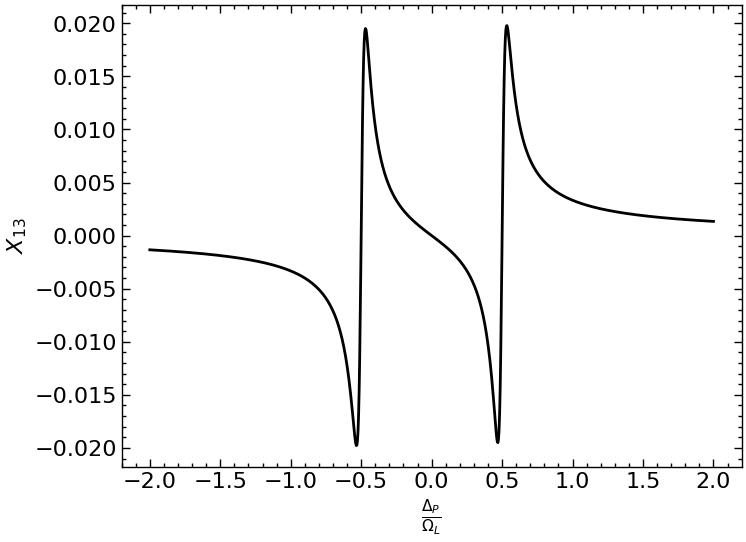

In [27]:
plt.style.use(['science','notebook'])
plt.plot(DeltaP_num,X13,color='black')
plt.xlabel(r'$\frac{\Delta_P}{\Omega_L}$')
plt.ylabel(r'$X_{13}$')

Text(0, 0.5, '$Y_{13}$')

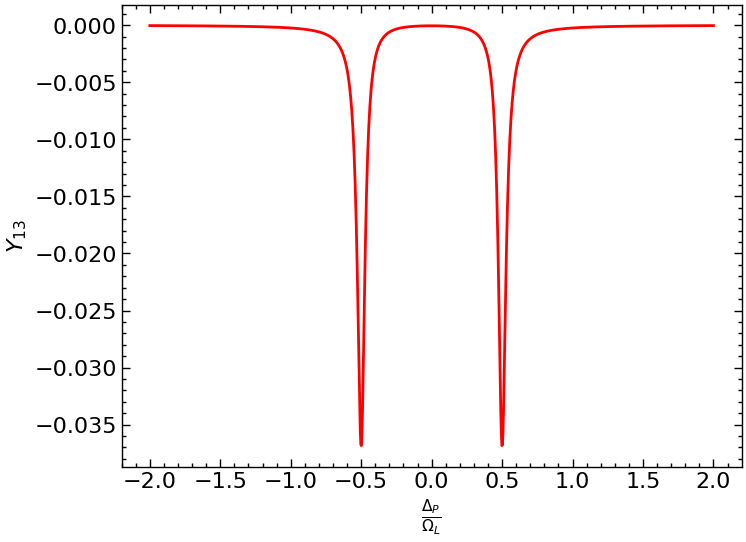

In [28]:
plt.plot(DeltaP_num,Y13,color='red')
plt.xlabel(r'$\frac{\Delta_P}{\Omega_L}$')
plt.ylabel(r'$Y_{13}$')

In [29]:
fitx=open("dades.txt",'w')
for i in range(len(DeltaP_num)):
    fitx.write(str(DeltaP_num[i]) + '\t' + str(X13[i])+'\t'+str(Y13[i])+'\n')
fitx.close()

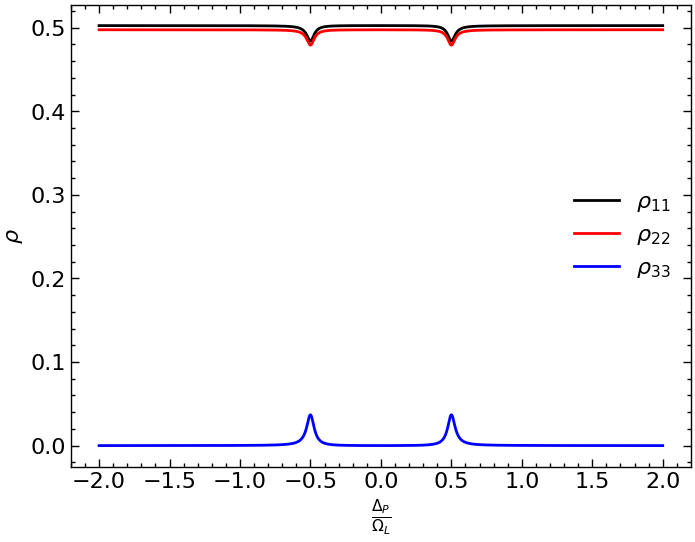

In [30]:
plt.plot(DeltaP_num,Rho11,color='black',label=r'$\rho_{11}$')
plt.plot(DeltaP_num,Rho22,color='red',label=r'$\rho_{22}$')
plt.plot(DeltaP_num,Rho33,color='blue',label=r'$\rho_{33}$')
plt.xlabel(r'$\frac{\Delta_P}{\Omega_L}$')
plt.ylabel(r'$\rho$')
plt.legend()

In [31]:
x12_f=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31),sols.get(x12))
X12=x12_f(RabiL_num,RabiP_num,DeltaL_num,DeltaP_num,Gamma21_num,Gamma31_num)
y12_f=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31),sols.get(y12))
Y12=y12_f(RabiL_num,RabiP_num,DeltaL_num,DeltaP_num,Gamma21_num,Gamma31_num)
x23_f=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31),sols.get(x23))
X23=x13_f(RabiL_num,RabiP_num,DeltaL_num,DeltaP_num,Gamma21_num,Gamma31_num)
y23_f=smp.lambdify((RabiL,RabiP,deltaL,deltaP,gamma21,gamma31),sols.get(y23))
Y23=x13_f(RabiL_num,RabiP_num,DeltaL_num,DeltaP_num,Gamma21_num,Gamma31_num)

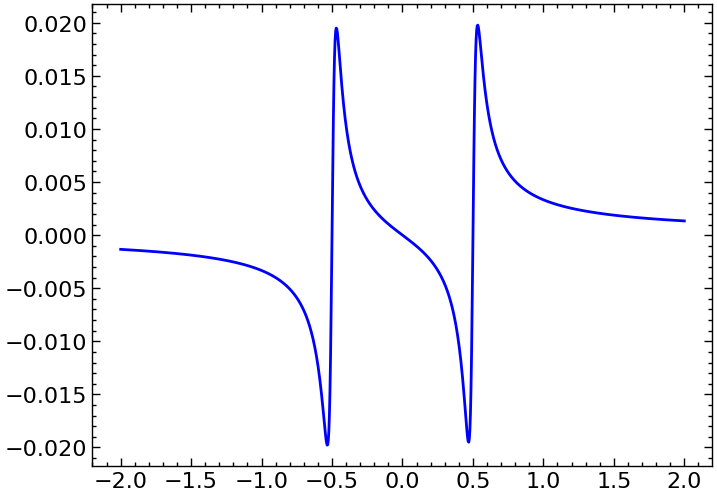

In [32]:
#plt.plot(DeltaP_num,X12,color='black')
#plt.plot(DeltaP_num,Y12,color='red')
#plt.plot(DeltaP_num,X23,color='green')
plt.plot(DeltaP_num,Y23,color='blue')

In [33]:
def dSdt(S,t):
    x12,y12,x13,y13,x23,y23,rho11,rho22 =S
    return[f11(RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,*S),f22(RabiL,RabiP,deltaL,gamma21,gamma31,deltaP,*S),f12(RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,*S),g12(RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,*S),f13(RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,*S),g13(RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,*S),f23(RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,*S),g23(RabiL,RabiP,deltaL,deltaP,gamma21,gamma31,*S)]

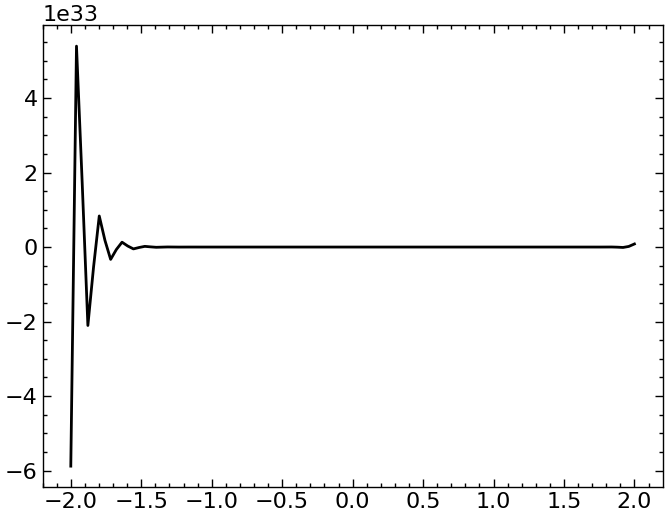

In [34]:
tdens=np.linspace(0,100,10000)
RabiL=1.0
RabiP=0.01
deltaL=0
gamma21=0.5
gamma31=0.5
DeltaP=np.linspace(-2.0,2.0,100)
X13=[]
for detuning in DeltaP:
    deltaP=detuning
    ans=odeint(dSdt,y0=[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 0.1],t=tdens)
    #print(ans.T[2][-1])
    X13.append(ans.T[2][-1])
plt.plot(DeltaP,X13,color='black')
